<center><h4>Random Projection</h4></center>

<br>**Problem statement:**
<br>You have a randomly generated dataset containing the 100 samples and 10k features. 
<br>(a) Perform dimensionality reduction on this dataset using Random Projection at different error thresholds and show the variations in distortion for 10k features
<br>(b) Get the reduced dataset for an eps value of 0.1

In [33]:
import numpy as np
import pandas as pd
from sklearn import random_projection
from sklearn.random_projection import johnson_lindenstrauss_min_dim
import matplotlib.pyplot as plt                   #Plot outputs

In [29]:
# Generate a random 100 x 10000 array
RandomData = np.random.rand(100, 10000)

# View this array
pd.DataFrame(RandomData).head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.184364,0.131979,0.207663,0.899662,0.279727,0.041461,0.650937,0.345714,0.852294,0.992167,...,0.170261,0.456365,0.082494,0.379842,0.170610,0.912993,0.754471,0.874379,0.950292,0.112035
1,0.963434,0.046169,0.701029,0.788123,0.030248,0.119500,0.452836,0.659806,0.848801,0.889395,...,0.120651,0.845183,0.829182,0.556654,0.432339,0.784514,0.402024,0.266612,0.295230,0.674401
2,0.732443,0.776415,0.664135,0.713896,0.510051,0.686759,0.325481,0.801707,0.668467,0.009107,...,0.575367,0.936806,0.653970,0.099025,0.991871,0.411773,0.380011,0.808157,0.718362,0.112433
3,0.106974,0.190150,0.278071,0.108227,0.057883,0.005264,0.800780,0.982250,0.817985,0.219997,...,0.213467,0.935241,0.849567,0.689979,0.727948,0.067714,0.731487,0.837536,0.397258,0.092662
4,0.871228,0.391612,0.057434,0.333322,0.257451,0.310669,0.224644,0.423953,0.100295,0.646179,...,0.073080,0.627219,0.421178,0.073358,0.842296,0.460513,0.668776,0.153327,0.013663,0.973585


In [30]:
# Display the number of minimum dimensions at different error threshold levels
johnson_lindenstrauss_min_dim(100, eps=[0.5, 0.1, 0.01])

array([   221,   3947, 370886])

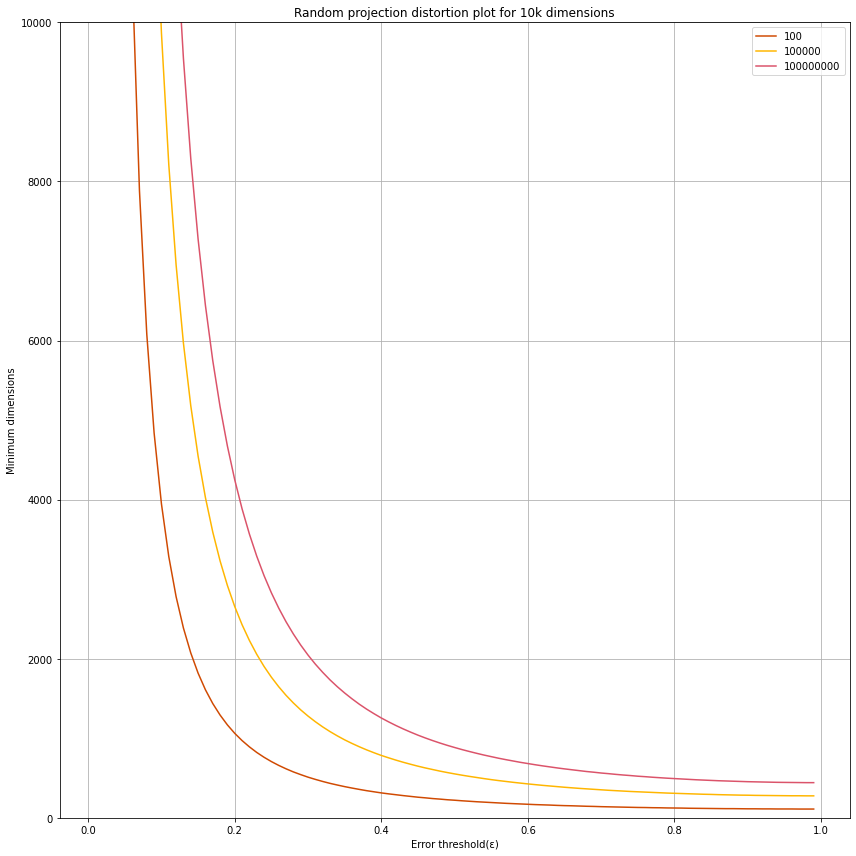

In [31]:
# Distortion plot
fig, ax = plt.subplots(figsize = (12,12))
 
eps_range = np.arange(0.01,1,0.01)
# n = 100    
y = list()
for x in eps_range:
    y.append(johnson_lindenstrauss_min_dim(100, eps = x))

# creating the bar & line plots
plot1 = ax.plot(eps_range, y, color ='#D04A02', label = '100')

# n = 100k    
y = list()
for x in eps_range:
    y.append(johnson_lindenstrauss_min_dim(100000, eps = x))

# creating the bar & line plots
plot2 = ax.plot(eps_range, y, color ='#FFB600', label = '100000')


# n = 100m    
y = list()
for x in eps_range:
    y.append(johnson_lindenstrauss_min_dim(100000000, eps = x))

# creating the bar & line plots
plot3 = ax.plot(eps_range, y, color ='#DB536A', label = '100000000')

plt.legend()
#ax.legend([plot1, plot2, plot3], ['label1', 'label2', 'label3'])

#Set plot labels
ax.set_xlabel(r'Error threshold(ε)', fontsize=10)
ax.set_ylabel(r'Minimum dimensions', fontsize=10)
ax.set_title('Random projection distortion plot for 10k dimensions')

ax.set_ylim(0,10000)

#Customize plot
ax.grid(True)
fig.tight_layout()

plt.show()

In [38]:
RP = random_projection.GaussianRandomProjection(eps = 0.1)
ReducedRandomData = RP.fit_transform(RandomData)
pd.DataFrame(ReducedRandomData).head()

,0,1,2,3,4,5,6,7,8,9,...,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946
0,-0.029772,1.463836,0.725946,-0.156662,-0.033269,-0.511475,-1.066251,1.622245,-0.644840,-1.028261,...,-0.653010,0.068320,-0.021540,1.982713,0.230347,0.265770,0.405885,-0.750942,1.077614,-0.032696
1,-0.455831,2.232508,1.233012,-0.753399,0.773114,0.292356,-0.984964,0.397297,-1.357298,-0.675850,...,-0.902231,0.059504,0.412803,1.257785,0.143854,-0.158168,0.889156,-0.122616,0.781111,0.072026
2,-1.526185,1.145893,1.162640,-1.280782,-0.122746,-0.610797,-1.427653,1.312272,-1.051324,-0.913599,...,0.167201,0.320730,-0.260103,0.401131,1.023305,-0.103450,0.060244,0.459219,1.405655,0.306275
3,0.338966,0.182458,0.654308,-0.660878,0.392002,0.764186,-1.727295,0.433642,-0.645936,-0.417134,...,0.121764,0.048894,0.792650,1.266912,0.279973,0.561350,0.205810,-0.509318,0.965137,0.638366
4,-0.808917,0.787996,1.032249,-0.190744,0.613215,0.115322,-1.317025,0.157872,-0.730943,-0.401850,...,0.254363,0.023844,0.682767,1.710067,0.383789,-0.905647,0.080281,-0.426896,1.238699,0.696787
